In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [32]:
df = pd.read_csv('../data/clean_reclean/time_series.csv')  # Ajuste le chemin si besoin

# Création de la colonne datetime
df['Date'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-01')

# Agrégation mensuelle
monthly_avg = df.groupby('Date')['SalePrice'].median().reset_index()
monthly_avg.columns = ['Date', 'AverageSalePrice']

# Mise en index datetime
monthly_avg.set_index('Date', inplace=True)
monthly_avg.index.name = 'Date'

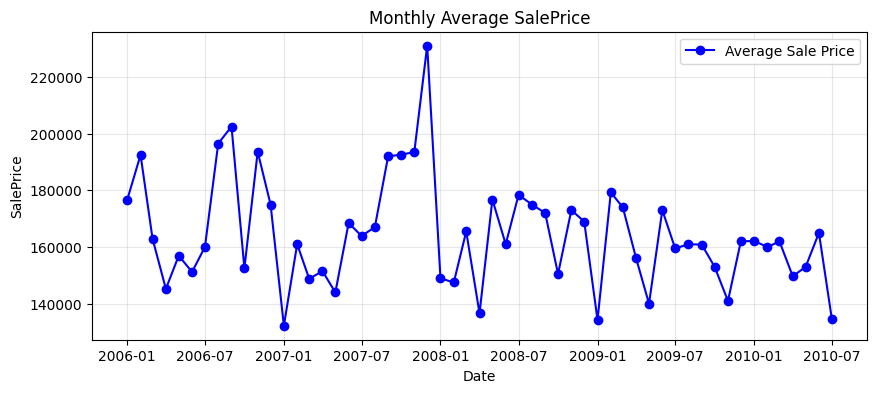

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_avg, label='Average Sale Price', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('Monthly Average SalePrice')
plt.xlabel('Date')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

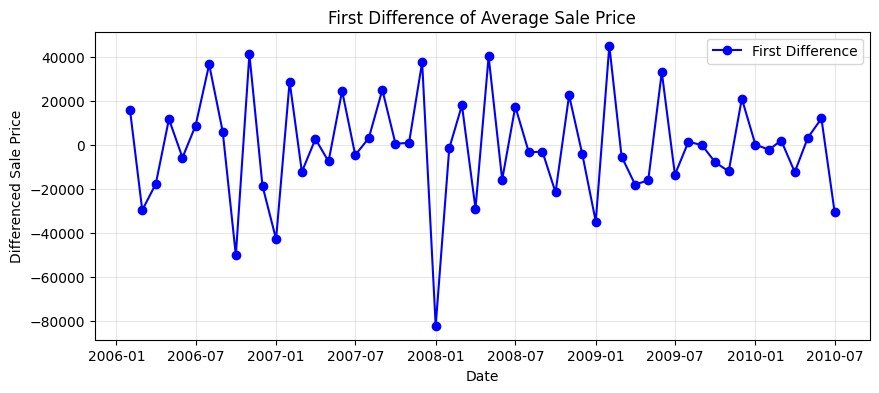

In [34]:
monthly_diff = monthly_avg['AverageSalePrice'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(monthly_diff, label='First Difference', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('First Difference of Average Sale Price')
plt.xlabel('Date')
plt.ylabel('Differenced Sale Price')
plt.legend()
plt.show()

In [35]:
X_orig = np.arange(len(monthly_avg)).reshape(-1, 1)
X_orig_const = sm.add_constant(X_orig)
y_orig = monthly_avg['AverageSalePrice'].values
model_orig = sm.OLS(y_orig, X_orig_const).fit()
original_p_values = model_orig.pvalues[1]
print(f"Original series trend p-value: {original_p_values:.4f}")

Original series trend p-value: 0.0660


In [36]:
log_avg = np.log(monthly_avg['AverageSalePrice'])
log_diff = log_avg.diff().dropna()

X_log_diff = np.arange(len(log_diff)).reshape(-1, 1)
X_log_diff_const = sm.add_constant(X_log_diff)
y_log_diff = log_diff.values
model_log_diff = sm.OLS(y_log_diff, X_log_diff_const).fit()
log_diff_p_value = model_log_diff.pvalues[1]
print(f"Log-differenced series trend p-value: {log_diff_p_value:.4f}")

Log-differenced series trend p-value: 0.8511


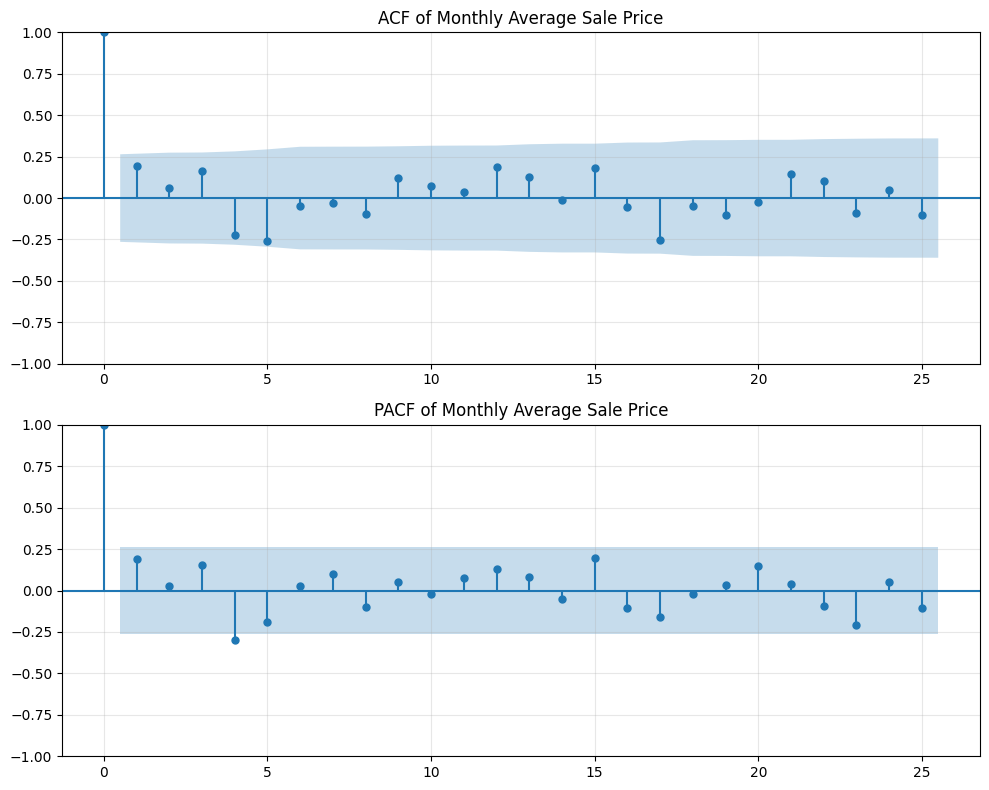

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(monthly_avg, lags=25, ax=axes[0])
axes[0].set_title('ACF of Monthly Average Sale Price')
axes[0].grid(True, alpha=0.3)

plot_pacf(monthly_avg, lags=25, ax=axes[1])
axes[1].set_title('PACF of Monthly Average Sale Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
print(monthly_avg)

            AverageSalePrice
Date                        
2006-01-01          176700.0
2006-02-01          192500.0
2006-03-01          162900.0
2006-04-01          145250.0
2006-05-01          156950.0
2006-06-01          151200.0
2006-07-01          160000.0
2006-08-01          196500.0
2006-09-01          202500.0
2006-10-01          152500.0
2006-11-01          193605.0
2006-12-01          175000.0
2007-01-01          132250.0
2007-02-01          161000.0
2007-03-01          148800.0
2007-04-01          151500.0
2007-05-01          144000.0
2007-06-01          168500.0
2007-07-01          163900.0
2007-08-01          167000.0
2007-09-01          192000.0
2007-10-01          192570.5
2007-11-01          193500.0
2007-12-01          231000.0
2008-01-01          149000.0
2008-02-01          147500.0
2008-03-01          165500.0
2008-04-01          136625.0
2008-05-01          176750.0
2008-06-01          161000.0
2008-07-01          178400.0
2008-08-01          175000.0
2008-09-01    

In [39]:
# from pmdarima import auto_arima

# model = auto_arima(
#     monthly_avg,
#     seasonal=True,
#     m=12,  # Monthly data
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True,
#     stepwise=True
# )

/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/data/python/lib

                                   Model  Forecast Error Variance
0   ARIMA(1, 1, 4) x SARIMA(0, 0, 0, 12)             3.842410e+08
1   ARIMA(2, 1, 4) x SARIMA(0, 0, 0, 12)             4.250834e+08
2   ARIMA(0, 1, 4) x SARIMA(0, 0, 0, 12)             4.668500e+08
3   ARIMA(1, 0, 4) x SARIMA(0, 0, 0, 12)             4.875722e+08
4   ARIMA(2, 0, 4) x SARIMA(0, 0, 0, 12)             4.973119e+08
5   ARIMA(0, 2, 4) x SARIMA(0, 0, 0, 12)             9.599530e+08
6   ARIMA(2, 2, 4) x SARIMA(0, 0, 0, 12)             1.043600e+09
7   ARIMA(1, 2, 4) x SARIMA(0, 0, 0, 12)             1.078173e+09
8   ARIMA(2, 2, 4) x SARIMA(1, 1, 0, 12)             1.369362e+09
9   ARIMA(2, 1, 4) x SARIMA(1, 1, 0, 12)             5.101745e+09
10  ARIMA(2, 1, 4) x SARIMA(1, 1, 1, 12)             5.753334e+09
11  ARIMA(2, 1, 4) x SARIMA(0, 1, 1, 12)             6.336455e+09
12  ARIMA(2, 1, 4) x SARIMA(0, 1, 0, 12)             1.405517e+10
13  ARIMA(0, 0, 4) x SARIMA(0, 0, 0, 12)             3.448673e+10
14  ARIMA(

/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


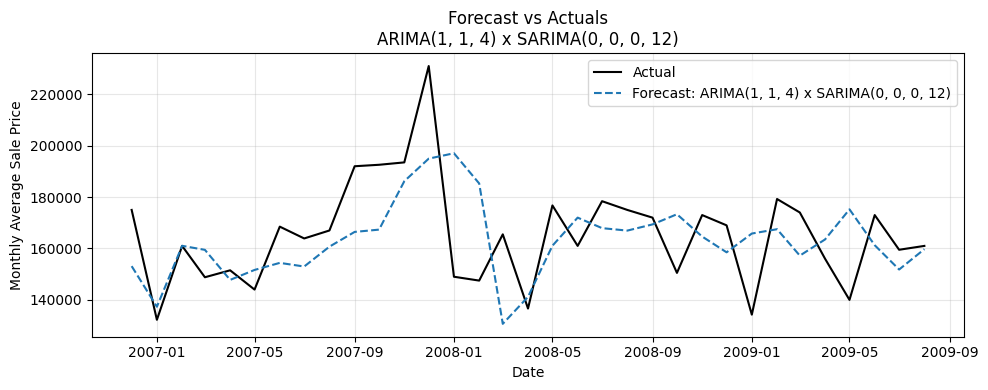

[161250.30278893 159342.92261222 157543.47804541 154021.0181258
 158208.06150019 154145.65655083 151492.01697291 148333.32369702
 159759.11602656 165876.09724812 159396.94110465 183652.2530063
 202081.09894235 198521.48721879 178455.01182278 132244.95784645
 130098.45171198 182388.47183197 176474.9004541  168322.483873
 167527.72813376 169279.13497087 173679.83334852 164524.66879862
 158317.99538986 164864.12888826 155207.1083182  141712.88644856
 163531.3837471  175157.75074683 162110.81223683 152691.21781554
 158911.22915563]


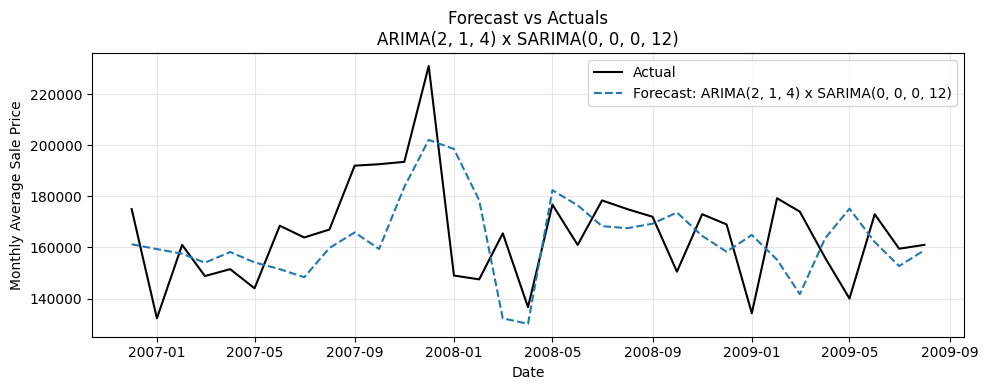

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Split dataset,
n = len(monthly_avg)
split = int(n * 0.8)  # 80% for training, 20% for testing
split2 = int(n * 0.2) 
train = pd.concat([monthly_avg.iloc[:split2], monthly_avg.iloc[split:]])
test = monthly_avg.iloc[split2:split]

# split = int(n * 0.8)  # 80% for training, 20% for testing
# train = monthly_avg
# test = monthly_avg.iloc[split:]

#Specify combinations,
non_seasonal_orders = [
    (2,1,4),
    (1,1,4),
    (0,1,4),
    (0,0,4),
    (1,0,4),
    (2,2,4),
    (2,0,4),
    (1,2,4),
    (0,2,4),

]

seasonal_orders = [
    (0,0,0,12),
    (1,1,1,12),
    (1,1,0,12),
    (0,1,1,12),
    (0,1,0,12),

]

# Dictionary to hold results,
results = {}

# Loop over combinations,
for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        history = train.copy()

        for t in range(len(test)):
            model = SARIMAX(history,
                            order=ns_order,
                            seasonal_order=s_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit(disp=False)

            forecast = model.forecast(steps=1).iloc[0]
            actual = test['AverageSalePrice'].iloc[t]

            preds.append(forecast)
            actuals.append(actual)

            # Update history with actual
            history = pd.concat([history, test.iloc[[t]]])

        errors = np.array(actuals) - np.array(preds)
        var_error = np.var(errors)

        results[label] = {
            'Forecasts': preds,
            'Actuals': actuals,
            'Errors': errors,
            'Variance of Forecast Error': var_error
        }

# Create summary DataFrame and get best two models,
summary_df = pd.DataFrame([
    {'Model': name, 'Forecast Error Variance': res['Variance of Forecast Error']}
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)



print(summary_df)
# Plot only top 2 models,
for name in summary_df['Model'][:2]:
    res = results[name]
    # Ensure both x and y are numpy arrays of the same length
    x = test.index.values[:len(res['Actuals'])]
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])
    print(forecasts)
    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    


/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index begi

                                   Model  Forecast Error Variance          AIC
0   ARIMA(1, 1, 1) x SARIMA(1, 1, 1, 12)                      NaN   314.085513
1   ARIMA(1, 1, 1) x SARIMA(1, 1, 0, 12)                      NaN   286.211453
2   ARIMA(1, 1, 1) x SARIMA(0, 1, 1, 12)                      NaN   348.815708
3   ARIMA(1, 1, 1) x SARIMA(0, 1, 0, 12)                      NaN   529.780887
4   ARIMA(1, 1, 1) x SARIMA(0, 0, 0, 12)                      NaN   798.208085
5   ARIMA(1, 1, 1) x SARIMA(1, 0, 0, 12)                      NaN   545.594294
6   ARIMA(1, 1, 1) x SARIMA(1, 0, 1, 12)                      NaN  2854.314904
7   ARIMA(2, 1, 1) x SARIMA(1, 1, 1, 12)                      NaN   277.889736
8   ARIMA(2, 1, 1) x SARIMA(1, 1, 0, 12)                      NaN   268.676803
9   ARIMA(2, 1, 1) x SARIMA(0, 1, 1, 12)                      NaN   313.463739
10  ARIMA(2, 1, 1) x SARIMA(0, 1, 0, 12)                      NaN   531.129923
11  ARIMA(2, 1, 1) x SARIMA(0, 0, 0, 12)            

/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_1061/1118985868.py:47: RuntimeWarning: overflow encountered in exp
  preds.append(np.exp(forecast))
/tmp/ipykernel_1061/1118985868.py:48: RuntimeWarning: overflow encountered in exp
  actuals.append(np.exp(actual))
/tmp/ipykernel_1061/1118985868.py:58: RuntimeWarning: invalid value encountered in subtract
  errors = np.array(actuals) - np.array(preds)


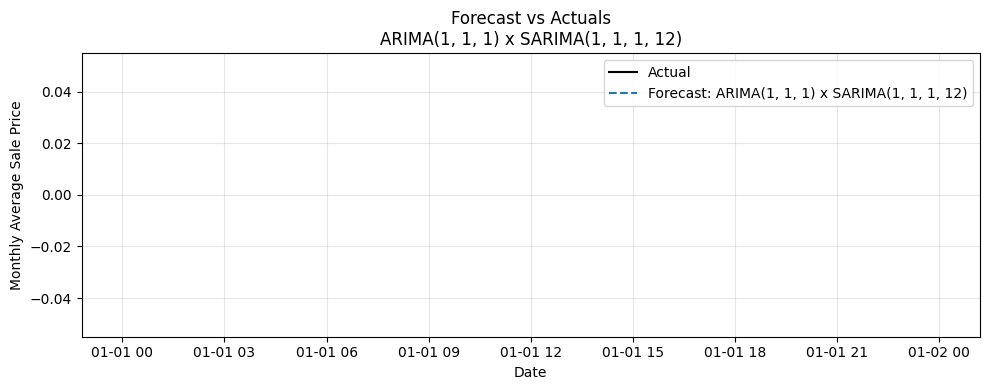

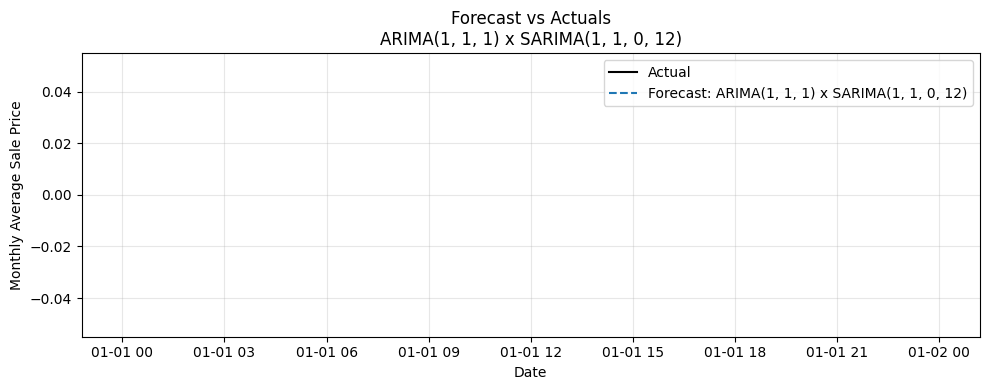

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'monthly_avg' is a DataFrame with a datetime index and a column named 'AverageSalePrice'
# Make sure the index is datetime formatted
monthly_avg.index = pd.to_datetime(monthly_avg.index)

# Split dataset
n = len(monthly_avg)
split = int(n * 0.8)
split2 = int(n * 0.2)

train = pd.concat([monthly_avg.iloc[:split2], monthly_avg.iloc[split:]])
test = monthly_avg.iloc[split2:split]

# Specify combinations
non_seasonal_orders = [
    (1,1,1), (2,1,1), (1,1,0)
]

seasonal_orders = [
    (1,1,1,12), (1,1,0,12), (0,1,1,12), (0,1,0,12),
    (0,0,0,12), (1,0,0,12), (1,0,1,12),
]

# Dictionary to hold results
results = {}

for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        aics = []
        history = train.copy()

        for t in range(len(test)):
            try:
                model = SARIMAX(history,
                                order=ns_order,
                                seasonal_order=s_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(disp=False)
                forecast = model.forecast(steps=1).iloc[0]
                actual = test['AverageSalePrice'].iloc[t]

                # Invert log for both forecast and actual
                preds.append(np.exp(forecast))
                actuals.append(np.exp(actual))
                aics.append(model.aic)

                # Update history with actual
                history = pd.concat([history, test.iloc[[t]]])
            except Exception as e:
                print(f"Model {label} failed: {e}")
                break

        if len(actuals) > 0:
            errors = np.array(actuals) - np.array(preds)
            var_error = np.var(errors)
            avg_aic = np.mean(aics) if aics else np.nan
            results[label] = {
                'Forecasts': preds,
                'Actuals': actuals,
                'Errors': errors,
                'Variance of Forecast Error': var_error,
                'AIC': avg_aic
            }

# Create summary DataFrame and get best two models
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Forecast Error Variance': res['Variance of Forecast Error'],
        'AIC': res['AIC']
    }
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)

print(summary_df[['Model', 'Forecast Error Variance', 'AIC']])

# Plot only top 2 models
for name in summary_df['Model'][:2]:
    res = results[name]
    x = test.index[:len(res['Actuals'])]  # Ensure x matches the length of actuals/forecasts
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])

    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return

                                   Model  Forecast Error Variance        AIC
0   ARIMA(1, 1, 1) x SARIMA(1, 1, 0, 12)             4.799895e+08 -12.461491
1   ARIMA(2, 1, 1) x SARIMA(0, 0, 0, 12)             4.814568e+08 -43.674106
2   ARIMA(1, 1, 1) x SARIMA(0, 0, 0, 12)             4.925292e+08 -44.255108
3   ARIMA(1, 1, 0) x SARIMA(1, 1, 0, 12)             4.938259e+08 -12.470066
4   ARIMA(1, 1, 0) x SARIMA(0, 0, 0, 12)             5.200591e+08 -43.518470
5   ARIMA(1, 1, 0) x SARIMA(1, 1, 1, 12)             5.248378e+08 -10.678012
6   ARIMA(1, 1, 1) x SARIMA(1, 1, 1, 12)             5.495760e+08  -8.392290
7   ARIMA(1, 1, 0) x SARIMA(2, 1, 1, 12)             6.038884e+08   0.072411
8   ARIMA(1, 1, 1) x SARIMA(2, 1, 1, 12)             6.883504e+08   0.481062
9   ARIMA(2, 1, 1) x SARIMA(1, 1, 1, 12)             6.956804e+08  -6.389384
10  ARIMA(2, 1, 1) x SARIMA(1, 1, 0, 12)             8.106091e+08  -9.603713
11  ARIMA(2, 1, 1) x SARIMA(2, 1, 1, 12)             8.833575e+08   4.961109

/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/data/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


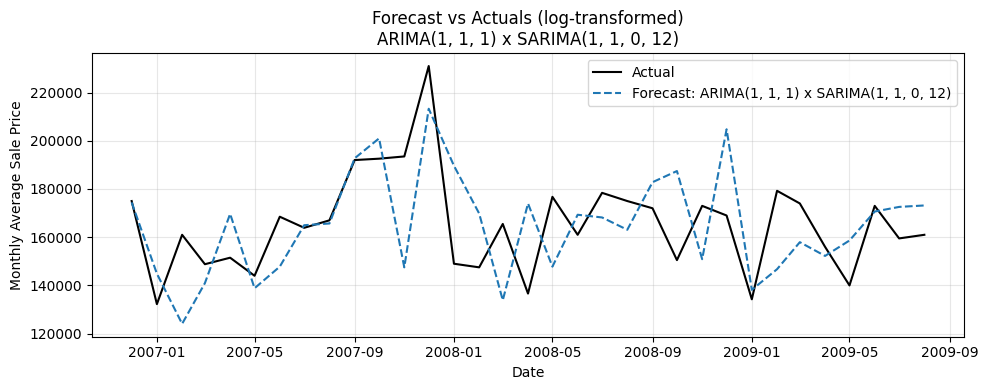

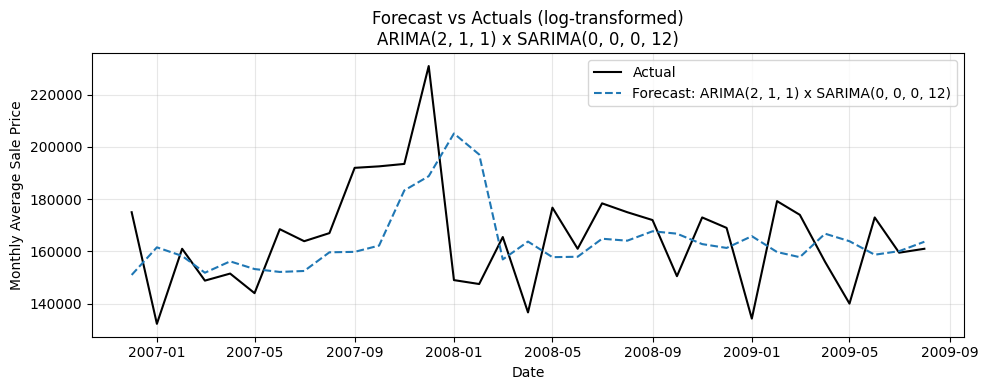

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Log-transform the data
log_monthly_avg = np.log(monthly_avg['AverageSalePrice'])
log_monthly_avg = log_monthly_avg.to_frame(name='LogAverageSalePrice')

# Split dataset
n = len(log_monthly_avg)
split = int(n * 0.8)
split2 = int(n * 0.2)
train = pd.concat([log_monthly_avg.iloc[:split2], log_monthly_avg.iloc[split:]])
test = log_monthly_avg.iloc[split2:split]

# split = int(n * 0.8)  # 80% for training, 20% for testing
# train = log_monthly_avg
# test = log_monthly_avg.iloc[split:]


# Specify combinations
non_seasonal_orders = [
    (1,1,1), (2,1,1), (1,1,0)
  
]
seasonal_orders = [
    (0,0,0,12), (1,1,1,12), (1,1,0,12), (2,1,1,12)
]

results = {}

for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        aics = []
        history = train.copy()

        for t in range(len(test)):
            try:
                model = SARIMAX(history,
                                order=ns_order,
                                seasonal_order=s_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(disp=False)
                forecast_log = model.forecast(steps=1).iloc[0]
                actual_log = test['LogAverageSalePrice'].iloc[t]

                # Invert log for both forecast and actual
                preds.append(np.exp(forecast_log))
                actuals.append(np.exp(actual_log))
                aics.append(model.aic)

                # Update history with actual
                history = pd.concat([history, test.iloc[[t]]])
            except Exception as e:
                print(f"Model {label} failed: {e}")
                break

        if len(actuals) > 0:
            errors = np.array(actuals) - np.array(preds)
            var_error = np.var(errors)
            avg_aic = np.mean(aics) if aics else np.nan
            results[label] = {
                'Forecasts': preds,
                'Actuals': actuals,
                'Errors': errors,
                'Variance of Forecast Error': var_error,
                'AIC': avg_aic
            }

# Create summary DataFrame and get best two models
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Forecast Error Variance': res['Variance of Forecast Error'],
        'AIC': res['AIC']
    }
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)

print(summary_df[['Model', 'Forecast Error Variance', 'AIC']])

# Plot only top 2 models
for name in summary_df['Model'][:2]:
    res = results[name]
    x = test.index.values[:len(res['Actuals'])]
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])
    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals (log-transformed)\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()